In [1]:
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('Data/03B-perfils-com-rfdv-02.csv', index_col=0)

In [16]:
df.head()

,distinct_id,count_eventos,Browser,city,country_code,created,initial_referring_domain,last_seen,os,region,Source,recencia,duracao,frequencia
0,QKK4JVKAB9BFV2yLVoPCccYAmXI9QwRs.88dcefc39941b...,8287,Chrome 84.0,São Paulo,BR,2020-05-08 07:11:46,$direct,2020-07-28 15:34:10,Windows,Sao Paulo,LA Criar Conta,15,81,3
1,1723852f6f284-05818830b468d6-134b3c29-49d40-17...,5793,Chrome 84.0,Sao Jose do Rio Preto,BR,2020-05-21 11:40:59,leads2b.com,2020-08-05 18:35:38,Windows,Sao Paulo,CC CNPJ - Painel de Dados - E-mails,7,76,13
2,1724d0fbffc130-045e6b955db998-d373666-100200-1...,4296,Chrome 83.0,Guarapuava,BR,2020-05-25 12:19:35,$direct,2020-06-05 09:17:50,Windows,Parana,LA Criar Conta,68,10,10
3,SGIRpUNfoHiJMGa2AO7VlWg6mjGlDGHt.27dd4e881e36a...,3668,Chrome 84.0,Londrina,BR,2020-05-11 08:15:58,$direct,2020-08-12 13:35:45,Windows,Parana,LA Criar Conta,0,93,36
4,17231edb3c2d1-023a308ef89129-d373666-1fa400-17...,3403,Chrome 83.0,Salto,BR,2020-05-20 05:52:36,$direct,2020-07-02 17:28:51,Windows,Sao Paulo,LA Criar Conta,41,43,12


In [17]:
df.os.replace(['Windows', 'Chrome OS', 'Linux', 'Mac OS X'], ['Desktop', 'Desktop', 'Desktop', 'Desktop'], inplace=True)

In [18]:
df.os.replace(['Android', 'iOS'], ['Mobile', 'Mobile'], inplace=True)

In [4]:
df.shape

(8200, 14)

In [5]:
df.describe()

,count_eventos,recencia,duracao,frequencia
count,8200.000000,8200.000000,8200.000000,8200.000000
mean,67.659878,37.960000,10.062927,2.830732
std,212.917299,23.810804,20.712947,4.960375
min,1.000000,0.000000,0.000000,1.000000
25%,5.000000,19.000000,0.000000,1.000000
50%,14.000000,36.000000,0.000000,1.000000
75%,51.000000,57.000000,7.000000,2.000000
max,8287.000000,84.000000,100.000000,63.000000


Aqui o que mais me chama atenção é o tamanho da diferença entre a mediana e a média. A médiana de Volume é 14, mas média é 67, quase cinco vezes maior. A mediana de Duração é 0 (ou seja, apenas um dia), enquanto a média é de 10 dias. Isso mostra que temos uma distribuição muito desigual, e que alguns poucos usuários estão fazendo muitos eventos ou entrando em muitos dias e puxando as médias para cima.

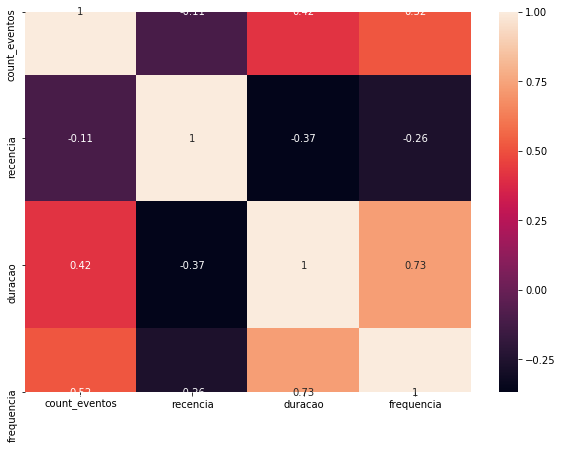

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)

Aqui, só uma coisa me chama atenção: a correlação entre duração e volume é baixa, apenas 0.42. Isso parece indicar que temos poucos usuários que fazem muitos enventos recorrentemente, e o comportamento mais comum é ou em um curto espaço de tempo fazer muitos eventos ou entrar espaçadamente e fazendo poucos eventos por sessão.

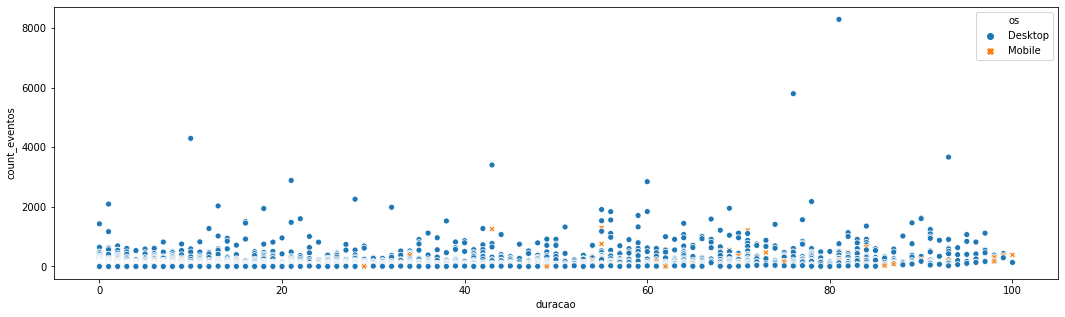

In [19]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=df, x="duracao", y="count_eventos", hue="os", style="os", legend="full")

Aqui isso também fica claro, não há praticamente nenhuma relação entre a quanto tempo o usuário está usando o sistema e quantos eventos ele fez, o que reforça a hipótese de usuários que entram esporadicamente para validar um dado ou outro.

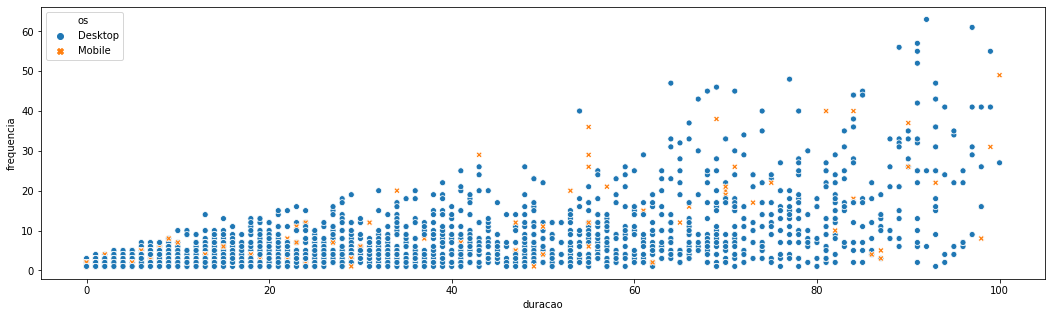

In [20]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=df, x="duracao", y="frequencia", hue="os", style="os", legend="full")

Já Frequência e Duração tem uma correlação um pouco maior, como era de se esperar, já que necessariamente ao entrar em múltiplos dias distintos você está aumentando a sua Duração.

Mesmo assim, dá para ver que temos uma boa quantidade de usuários com muita Duração e praticamente nenhuma Frequência, ou seja, entraram uma vez e voltaram depois de meses.

Porém o que chama atenção aqui é que parece ter pouca relação entre o tipo de dispositivo e o engajamento. Será mesmo? Vamos investigar.

### Aprofundamento no Desktop vs. Mobile

In [44]:
df['os'].value_counts(normalize=True)

Desktop    0.784634
Mobile     0.215366
Name: os, dtype: float64

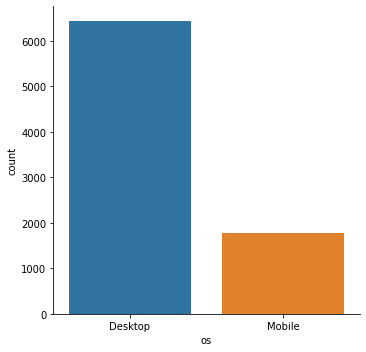

In [41]:
ax = sns.catplot(x="os", kind="count", data=df)

Primeiro a distribuição: temos cerca de 78% dos usuários acessando a plataforma via Desktop e 22% usando Mobile, ou seja quase um quinto, não é pouca coisa.

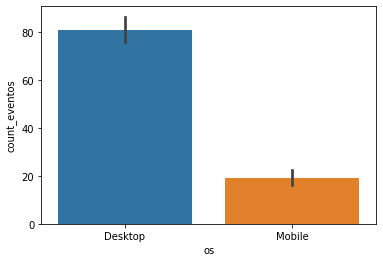

In [33]:
sns.barplot(x="os", y="count_eventos", data=df)

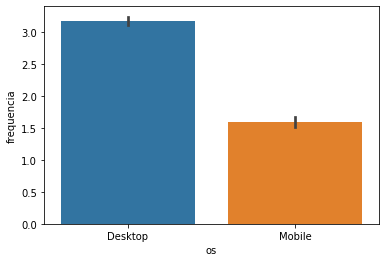

In [31]:
sns.barplot(x="os", y="frequencia", data=df, ci=68)

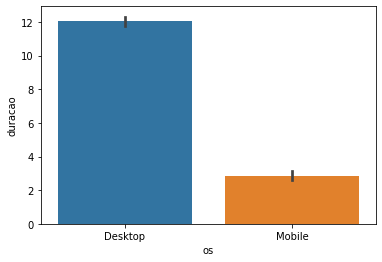

In [32]:
sns.barplot(x="os", y="duracao", data=df, ci=68)

Bom, agora ficou bem claro que usuários em dispositivos móveis engajam bem menos.